Medical Insurance Cost Prediction

1. Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,no of dependents ,smoker ,region  medical insurance is calculated .

The main objective of this project is to develop a predictive model that can accurately estimate the medical insurance cost for an individual based on their age, gender, BMI, number of dependents, smoking habit, and residential area in the US.

1.1 # Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.2 # Importing Dataset

In [2]:
df = pd.read_csv("medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


In [5]:
# Checking dimension of dataset
df.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns.Out of which 1 is target and remaining 6 are independent variables.

1.3 # Exploratory Data Analysis(EDA)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are three different types of data present in this dataset i.e. int64, float64, object

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This gives brief information about the dataset which inclues columns name, non-null values, dtypes,index rane, and memory usage.

<AxesSubplot:>

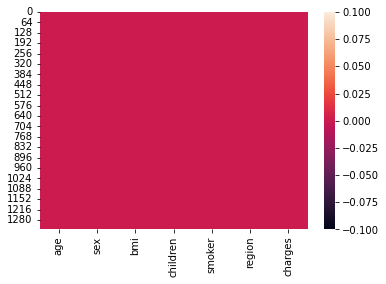

In [10]:
# lets visualize it using heatmap
sns.heatmap(df.isnull())

Here it is clearly visible that there is no missing data present.

In [11]:
# checking value count for each columns
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print('\n')

Column: age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


Column: sex
male      676
female    662
Name: sex, dtype: int64


Column: bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


Column: children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


Column: smoker
no     1064
yes     274
Name: smoker, dtype: int64


Column: region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
# loop through each column and print unique values
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())

Unique values in age:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Unique values in sex:
['female' 'male']
Unique values in bmi:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.7

In [13]:
# convert object data type to categorical data
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [14]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


# Description of dataset

In [16]:
# Statistical summary of numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 It provides a statistical summary of the numerical columns in your dataset. Here is what each row represents:

1.count: The number of non-null values in each column. In this case, it tells us that there are 1338 rows in the dataset and no missing values in the numerical columns.

2.mean: The average value of each column. For example, the mean age of the patients in this dataset is 39.2 years.

3.std: The standard deviation of each column. This measures how much the values in each column deviate from the mean.

4.min: The minimum value of each column. For example, the youngest patient in this dataset is 18 years old.

5.25%: The value at the 25th percentile of each column. This means that 25% of the values in each column are less than or equal to this value. For example, 25% of the patients in this dataset have fewer than or equal to 0 children.

6.50%: The value at the 50th percentile of each column. This is also known as the median. It represents the value that separates the bottom 50% of values from the top 50%. For example, the median BMI in this dataset is 30.4.

7.75%: The value at the 75th percentile of each column. This means that 75% of the values in each column are less than or equal to this value. For example, 75% of the patients in this dataset have fewer than or equal to 2 children.

8.max: The maximum value of each column. For example, the highest charge in this dataset is 63,770.

# Data Visualization- Graphical Analysis

Univariate Analysis

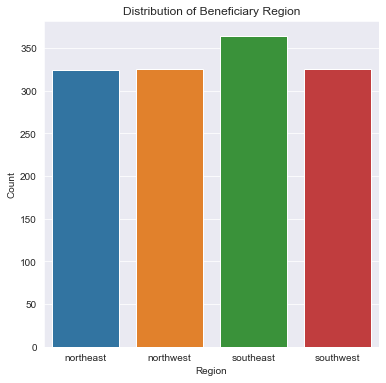

In [17]:
# Analyze the region column

sns.set_style('darkgrid')

plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=df)
plt.title('Distribution of Beneficiary Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Here in this plot the distribution of data in the southeast is the highest and similar in others. As we can clearly see the height of southeast bar is highest.

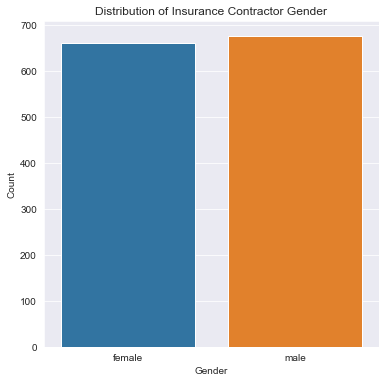

In [18]:
# Analyze the sex column
sns.set_style('darkgrid')

plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Insurance Contractor Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Here, in this plot distribution of data is almost same,height of male bar is little more than female

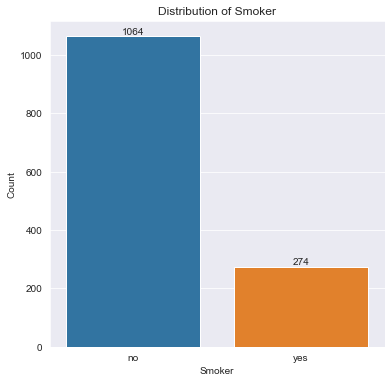

In [19]:
# Analyze the smoker column
sns.set_style('darkgrid')

plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=df)
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Get the count of each category in the "smoker" column
count = df['smoker'].value_counts()

# Display the count as text on the plot
for i in range(len(count)):
    plt.annotate(str(count[i]), xy=(i, count[i]), ha='center', va='bottom')

plt.show()

Here in this plot we can see the frequency of individual in the dataset. The height of bars represents non-smoker and smoker and we can clearly see the count of non smokers is higher than the smoker.

Let's analyze categorical column with count plot

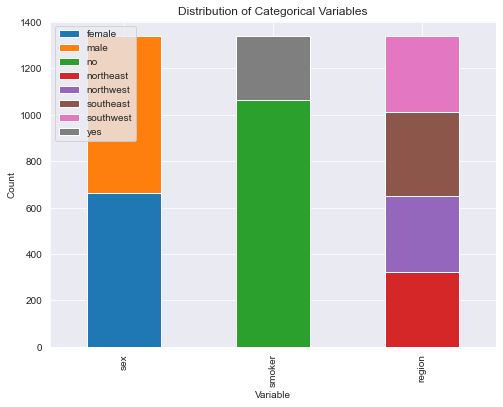

In [20]:
categorical_cols = ['sex', 'smoker', 'region']

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))

df[categorical_cols].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Distribution of Categorical Variables')
ax.set_xlabel('Variable')
ax.set_ylabel('Count')
plt.show()

Here plotted a stacked bar plot to see the distribution of categorical data. This plot allows for easy comparison of the distribution of categories across the variables

Let's analyze the distribution of data in the numerical columns

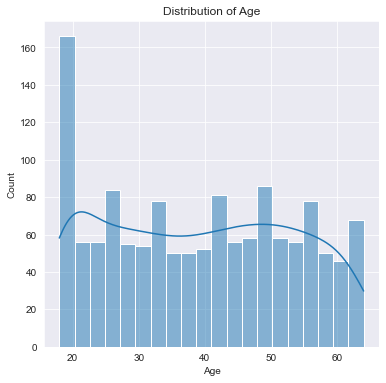

In [21]:
# Analyze the age column
sns.set_style('darkgrid')

plt.figure(figsize=(6, 6))
sns.histplot(x='age', data=df, bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Here in this plot we can see positively skewed distribution of data.  

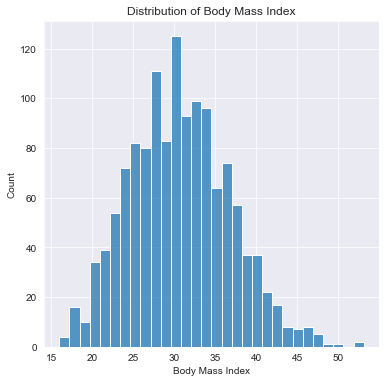

In [22]:
sns.set_style('darkgrid')

plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='bmi', bins=30)
plt.title('Distribution of Body Mass Index')
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.show()

Here in this plot data is approximately normally distributed, as the majority of BMI values falling between 20-40. We can also see few outliers.

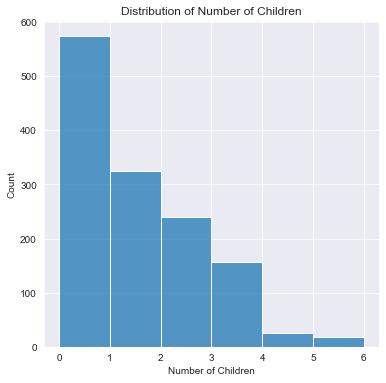

In [23]:
sns.set_style('darkgrid')

plt.figure(figsize=(6, 6))
sns.histplot(x='children', data=df, bins=range(7), kde=False)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

This graph will show the distribution of the number of children covered by health insurance. We can see the plot is positively skewed.

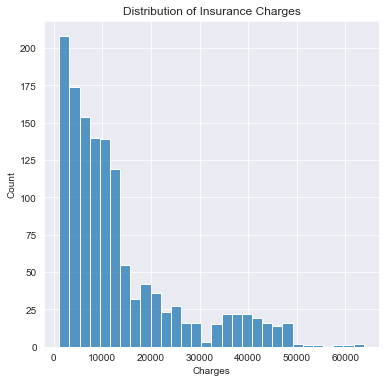

In [24]:
sns.set_style('darkgrid')

plt.figure(figsize=(6, 6))
sns.histplot(x='charges', data=df, bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

This plot will show the distribution of insurance charges of the individuals. We can clearly see the highly positive skewed distribution of data in this plot.

Let's analyze numerical columns with boxplot

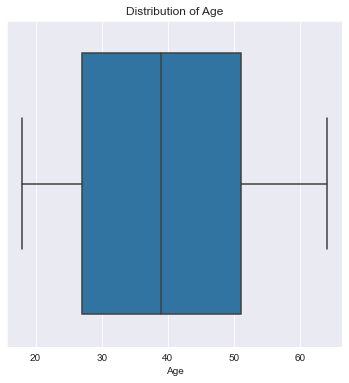

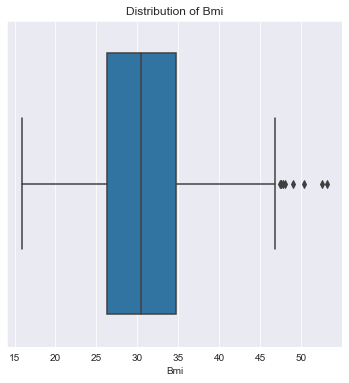

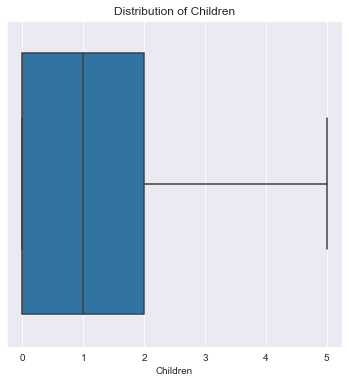

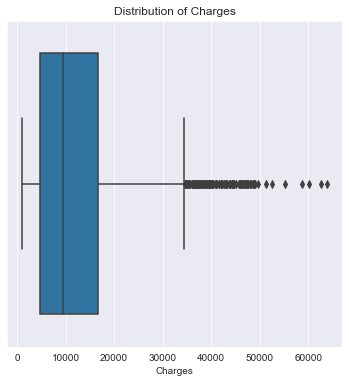

In [25]:
numerical_cols = ['age', 'bmi', 'children', 'charges']

sns.set_style('darkgrid')

for col in numerical_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(data=df, x=col)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.show()


As we can clearly see that the BMI and charges column are showing presence of outliers.

Bivariate Analysis

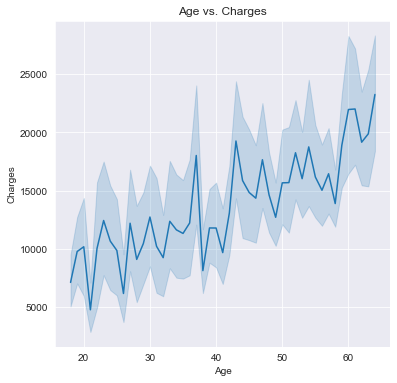

In [26]:
# Comparing Age vs Charges by line plot

sns.set_style('darkgrid')
plt.figure(figsize=(6, 6))
sns.lineplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

This line plot will show the trend of how charges vary with age. Here we can see steeper upward that is positive trend which indicates that charges are increasing at a faster rate with increasing age

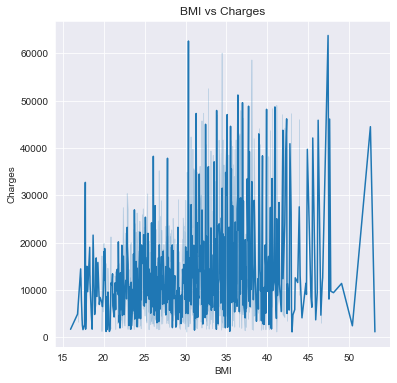

In [27]:
# Comparing BMI vs Charges by line plot

sns.set_style('darkgrid')
plt.figure(figsize=(6, 6))
sns.lineplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

This line plot shows the trend in the relationship between BMI and medical charges. We can see that as BMI increases, medical charges tend to increase as well. There are some outliers where individuals with higher BMIs have lower charges, but the overall trend is positive.

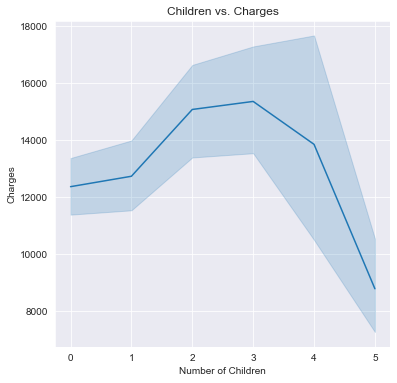

In [28]:
# Comparing Children vs Charges by line plot
sns.set_style('darkgrid')
plt.figure(figsize=(6, 6))
sns.lineplot(x='children', y='charges', data=df)
plt.title('Children vs. Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

This line plot shows the average medical charges for each number of children covered in the health insurance.We can see here that the average charges increase slightly with the number of children but again decreases which is giving an idea of uncertainty in the estimate of average charges. The relationship is not very strong here

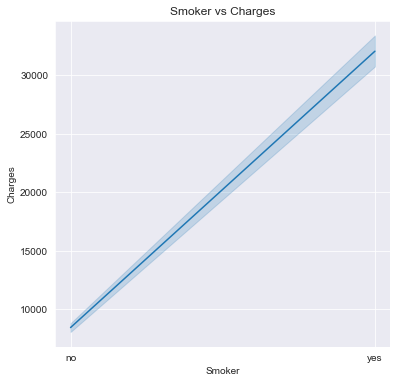

In [29]:
# Comparing Smoker vs Charges by line plot

sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
sns.lineplot(data=df, x='smoker', y='charges')
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

This plots shows the linear relationship between the variables. Here in this line plot between smoker status and charges, a straight linear line shows that there is a linear relationship between smoker status and charges, and that charges tend to be higher for smokers compared to non-smokers

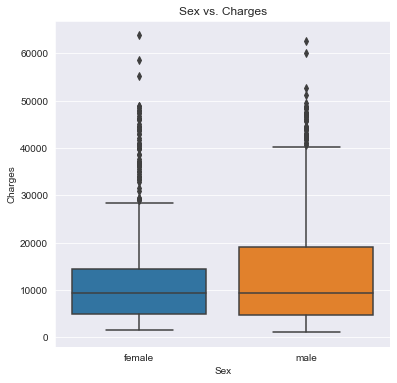

In [30]:
# Comparing Sex vs Charges by box plot(as line plot is not best suited for categorical column like this)

sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Sex vs. Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

In this specific plot, we can see that the median charges for females are lower than males, and females have more outliers than males. This indicates that there may be some differences in charges between males and females, with females tending to have lower charges on average but with a few individuals having much higher charges.

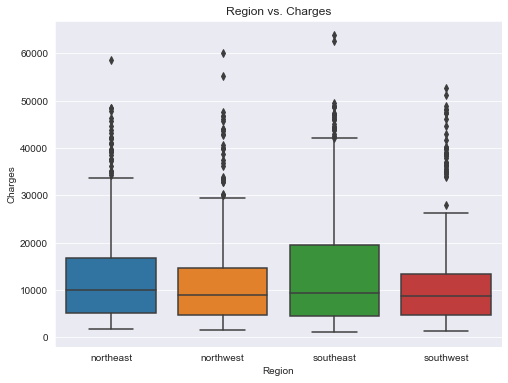

In [31]:
# comparing Region vs Charges via box plot(Categorical variable)

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs. Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

This plot shows the distribution of medical charges across different regions. Here we can see that the median charges for all four regions are relatively similar. However, the charges for the southeast region have the widest distribution, indicating more variability in the charges for that region compared to the others.The southwest region  has a normal distribution of charges with several outliers indicating higher charges for some individuals in that region.

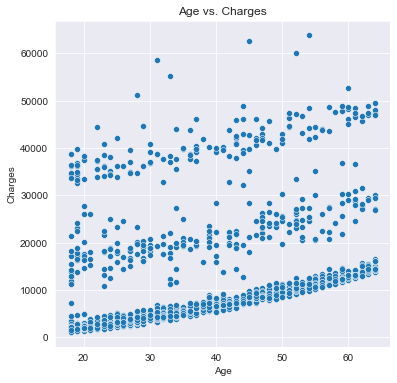

In [32]:
# Comparing Age vs Charges by scatter plot
sns.set_style('darkgrid')

plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

This scatter plot shows that there is a positive but weak correlation between age and charges, which means that as the age of the patient increases, the medical charges also tend to increase.We can also see that there are some outliers in the data where some patients have very high charges despite being relatively young.

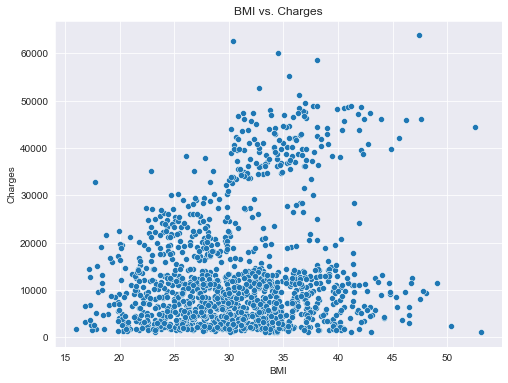

In [33]:
# Comparing BMI vs Charges by scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Here in this plot we can see that there is a positive  but not so strong correlation between BMI and charges. We can also see some outliers, particularly at the higher end of the BMI range

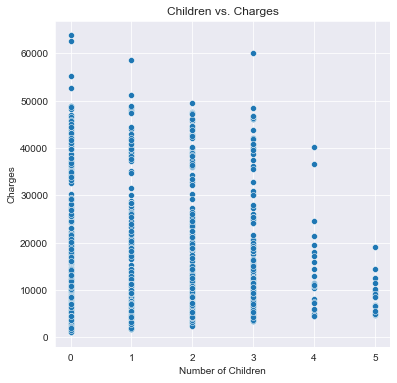

In [34]:
# Comparing Children vs Charges via scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(6, 6))
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs. Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

Here in this plot we can see that there is no clear relationship between the number of children and medical charges.

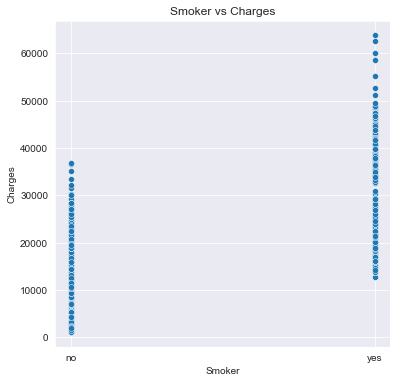

In [35]:
# Comparing Smoker vs charges by scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='smoker', y='charges')
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Here in this scatter plot, we can see clearly how being a smoker affects the medical charges. It can observable that smokers tend to have higher medical charges compared to non-smokers.

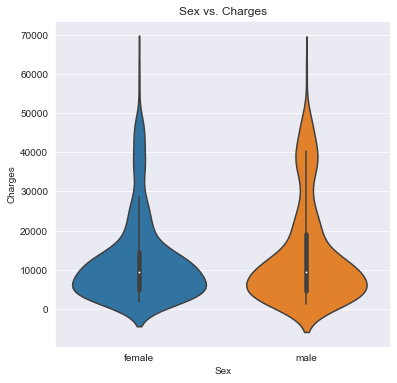

In [36]:
# Comparing Sex vs Charges by violin plot(as scatter plot is best suited for continous variable)

sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
sns.violinplot(data=df, x='sex', y='charges')
plt.title('Sex vs. Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

In this violin plot, we can see that the distribution of charges for males and females are relatively similar, with both having a peak around the median value. However, the distribution of charges for females is slightly wider than males, indicating that females have a slightly higher variance in charges.

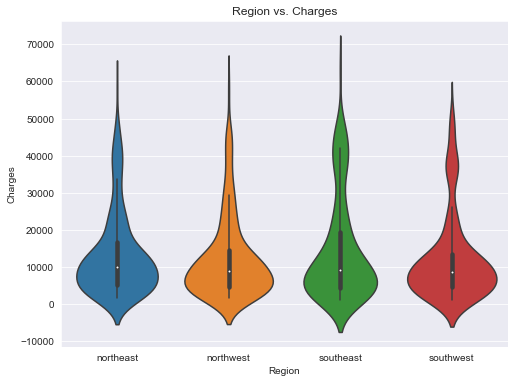

In [37]:
# Comparing Region vs Charges by violin plot(categorical)

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.violinplot(x='region', y='charges', data=df)
plt.title('Region vs. Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

In this plot, we can see that the southeast region has the highest charges, followed by the northeast and northwest regions. The southwest region has the lowest charges overall. The distribution of charges in the southwest region is the widest, indicating more variability in the charges for that region compared to the others. The southeast region has the narrowest distribution of charges among all the regions.

Let's compare the independent variables and analyze the relation between them and check the distribution

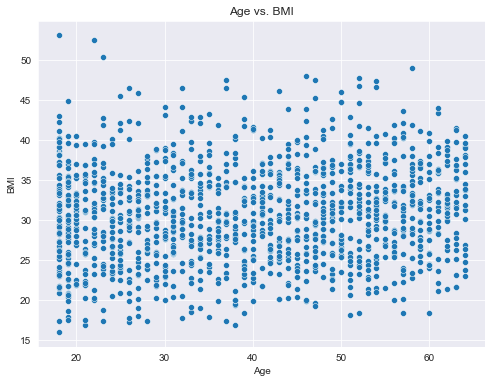

In [38]:
# Comparing Age vs BMI by scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Here in this plot, we can see that there is no clear pattern or trend between age and BMI. There are data points scattered throughout the plot with no obvious relationship between the two variables.

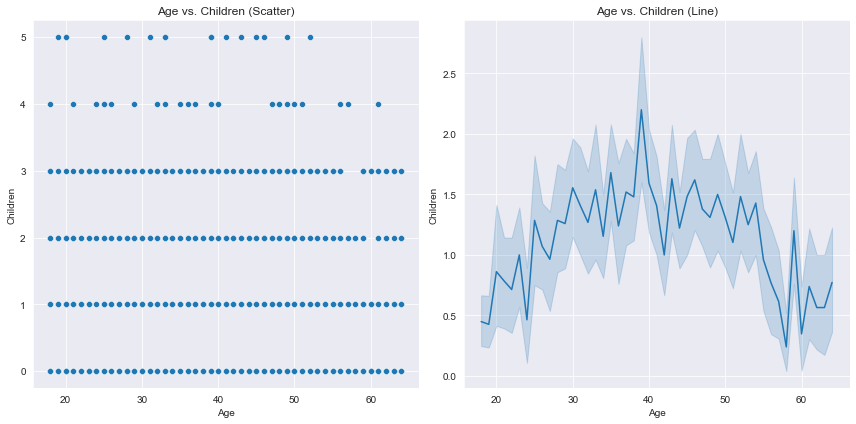

In [39]:
# Compare Age vs Children by scatter plot and line plot

sns.set_style('darkgrid')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(data=df, x='age', y='children', ax=ax1)
ax1.set_title('Age vs. Children (Scatter)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Children')

sns.lineplot(data=df, x='age', y='children', ax=ax2)
ax2.set_title('Age vs. Children (Line)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Children')

plt.tight_layout()
plt.show()

In the scatter plot, we can see that there is no strong linear relationship between age and the number of children. While, In the line plot, we can see the trend of the number of children with increasing age. We can observe that the number of children tends to increase with age until it peaks around the age of 40, after which it tends to decrease.

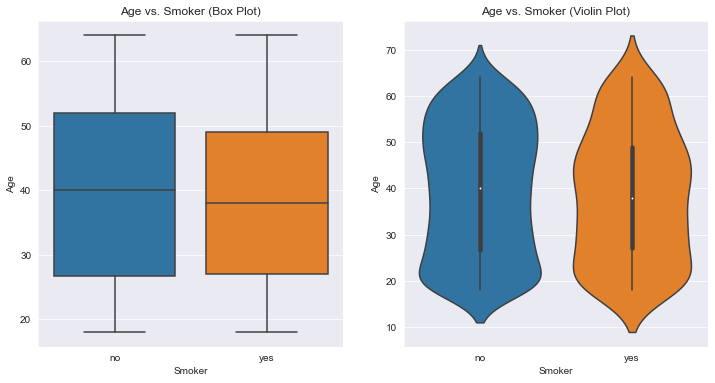

In [40]:
# Compare Age vs Smoker by boxplot and violin plot

sns.set_style('darkgrid')

fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.boxplot(x='smoker', y='age', data=df, ax=axs[0])
axs[0].set_title('Age vs. Smoker (Box Plot)')
axs[0].set_xlabel('Smoker')
axs[0].set_ylabel('Age')

sns.violinplot(x='smoker', y='age', data=df, ax=axs[1])
axs[1].set_title('Age vs. Smoker (Violin Plot)')
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('Age')
plt.show()

The box plot on the left shows the distribution of ages for smokers and non-smokers. We can see that the median age for smokers is slightly lower than non-smokers.

The violin plot on the right shows the same information, but the width of the plot indicates the density of the data points. We can see that there are more non-smokers at older ages, while smokers are relatively evenly distributed across age groups.

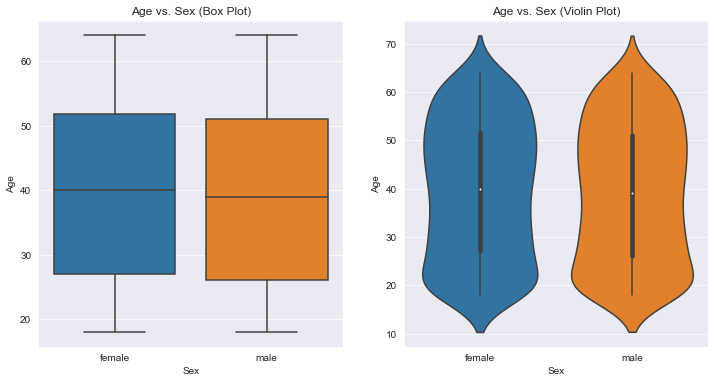

In [41]:
# Compare Age vs Sex by box and violin plot

sns.set_style('darkgrid')

fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(ax=axes[0], data=df, x='sex', y='age')
axes[0].set_title('Age vs. Sex (Box Plot)')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Age')

sns.violinplot(ax=axes[1], data=df, x='sex', y='age')
axes[1].set_title('Age vs. Sex (Violin Plot)')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Age')

plt.show()

In the first plot (Box plot), we can see the distribution of age for males and females. The median age for females is slightly higher than that for males, and the distribution of age for females is also slightly wider as compared to males.

Multivariate Analysis

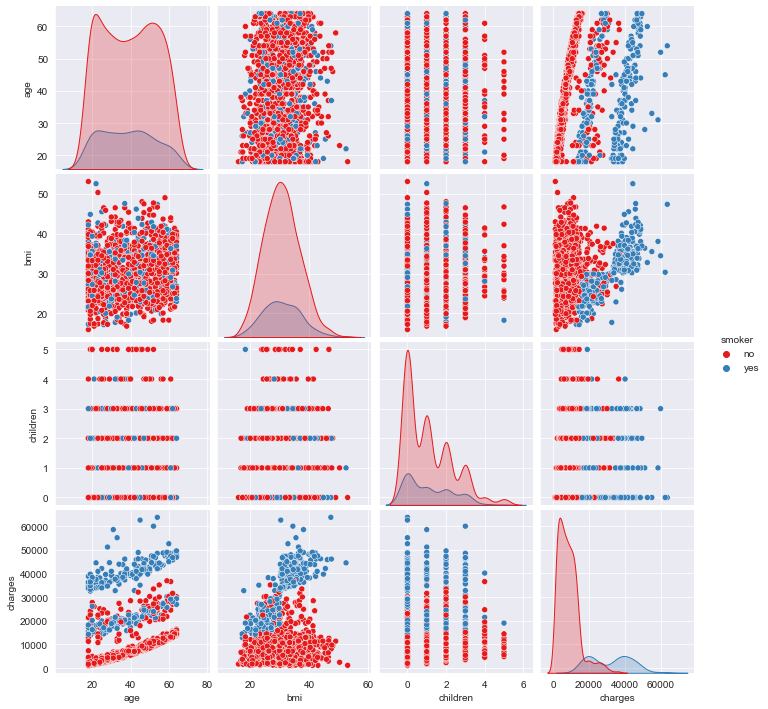

In [42]:
sns.pairplot(data=df, vars=['age', 'bmi', 'children', 'charges'], hue='smoker', palette='Set1')
plt.show()

In this pairplot, we can see the following:

1.The scatterplot of age vs. bmi shows a positive correlation, where higher ages are associated with higher bmi values. This relationship seems to hold across both smokers and non-smokers.

2.The scatterplot of age vs. children shows a weak correlation.This relationship also holds across both smokers and non-smokers.

3.The scatterplot of age vs. charges shows a positive correlation, where higher ages are associated with higher medical charges. Smokers seem to have slightly higher charges overall, regardless of age.

4.The scatterplot of bmi vs. children shows a weak positive correlation, where slightly higher numbers of children are associated with higher bmi values. This relationship seems to hold for non-smokers, but less so for smokers.

5.The scatterplot of bmi vs. charges shows a positive correlation, where higher bmi values are associated with higher medical charges. This relationship seems to hold for both smokers and non-smokers.

6.The scatterplot of children vs. charges shows a weak positive correlation, where slightly higher numbers of children are associated with higher medical charges. This relationship seems to hold for non-smokers, but less so for smokers.


In [43]:
# Removing outliers by IQR method

# define the columns that we want to remove outliers from
cols = ['age', 'bmi', 'children', 'charges']

# loop through each column
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

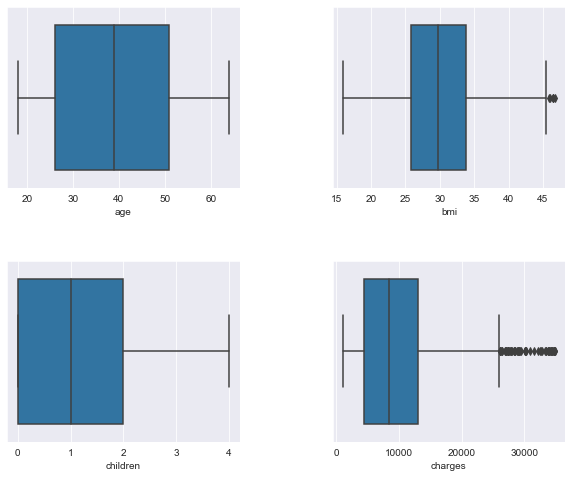

In [44]:
# lets check the outliers are removed by plotting boxplot

sns.set_style('darkgrid')

plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.show()

Here we can see that outliers from BMI column is removed but still present in charges column.


Let's try second approach to handle these outliers.

In [45]:
from scipy.stats.mstats import winsorize

# winsorize the charges column at the 95th percentile
df['charges'] = winsorize(df['charges'], limits=(0, 0.05))

In [46]:
# winsorize the bmi column at the 5th and 95th percentile
df['bmi'] = winsorize(df['bmi'], limits=(0.05, 0.05))

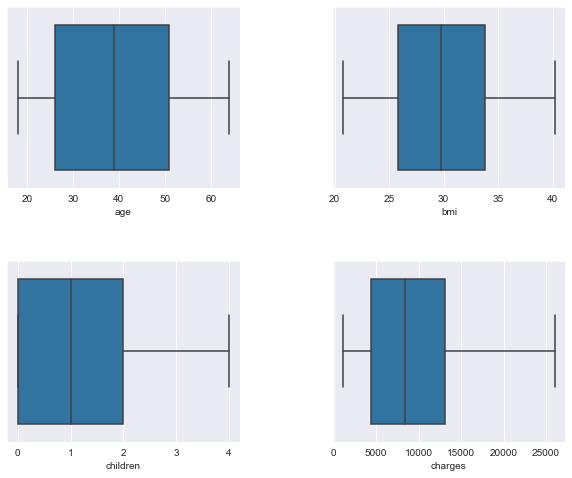

In [47]:
# lets again check the outliers are removed by plotting boxplot

sns.set_style('darkgrid')

plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.show()

Outliers are handled now

In [48]:
print(df.shape)

(1181, 7)


In [49]:
# Let's check data loss %
original_rows = df.shape[0]
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
df = df[(df['charges'] > lower_bound) & (df['charges'] < upper_bound)]
rows_after_outlier_removal = df.shape[0]
percent_data_loss = ((original_rows - rows_after_outlier_removal) / original_rows) * 100
print("Percentage of data loss due to outlier removal:", percent_data_loss)

Percentage of data loss due to outlier removal: 0.0


In [50]:
# Checking for skewness
df.skew()

age         0.074794
bmi         0.168887
children    0.785220
charges     0.897371
dtype: float64

In [51]:
# Removing Skewness using Box-Cox transformation method

# find the skewness of each numeric column
skewness = df[['age', 'bmi', 'children', 'charges']].skew()

# loop through each column and remove the skewness if it is greater than 0.5 or less than -0.5
for col in skewness.index:
    if skewness[col] > 0.5 or skewness[col] < -0.5:
        df[col] = np.log1p(df[col])

In [52]:
df.skew()

age         0.074794
bmi         0.168887
children    0.269353
charges    -0.374644
dtype: float64

Here we can see the skewness has been removed in children and charges column

# Encodes categorical column

In [53]:
# Using one-hot encoding method

from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
columns_to_encode = ['sex', 'smoker', 'region']
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the data using the one-hot encoder
encoded_cols = onehot_encoder.fit_transform(df[columns_to_encode])

# Create a dataframe of the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names(columns_to_encode))

# Drop the original non-encoded columns from the original dataframe
df.drop(columns_to_encode, axis=1, inplace=True)

# Concatenate the encoded dataframe with the original dataframe
df = pd.concat([df, encoded_df], axis=1)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.000000,9.734236,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,0.693147,7.453882,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,1.386294,8.400763,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.000000,9.998137,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.000000,8.260455,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1130,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
1139,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1146,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
1152,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0


The DataFrame has 1320 rows and 9 columns. The columns are:

age: numerical column representing the age of the person
    
bmi: numerical column representing the body mass index of the person
    
children: numerical column representing the number of children of the person
    
charges: numerical column representing the insurance charges of the person
    
sex_male: binary column indicating whether the person is male (1) or not (0)
    
smoker_yes: binary column indicating whether the person is a smoker (1) or not (0)
    
region_northwest: binary column indicating whether the person is from the northwest region (1) or not (0)
    
region_southeast: binary column indicating whether the person is from the southeast region (1) or not (0)
    
region_southwest: binary column indicating whether the person is from the southwest region (1) or not (0)

In [54]:
df.head(20)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.000000,9.734236,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,0.693147,7.453882,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,1.386294,8.400763,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.000000,9.998137,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.000000,8.260455,1.0,0.0,1.0,0.0,0.0
5,31.0,25.740,0.000000,8.231541,0.0,0.0,0.0,1.0,0.0
6,46.0,33.440,0.693147,9.016949,0.0,0.0,0.0,1.0,0.0
7,37.0,27.740,1.386294,8.893230,0.0,0.0,1.0,0.0,0.0
8,37.0,29.830,1.098612,8.765211,1.0,0.0,0.0,0.0,0.0
9,60.0,25.840,0.000000,10.166619,0.0,0.0,1.0,0.0,0.0


In [55]:
df.tail(20)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1037,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0
1047,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
1049,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1062,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0
1070,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
1085,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0
1088,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
1090,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
1096,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
1111,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [56]:
# Fill NaN values with the mean value of each column
charges_mean = df['charges'].mean()
bmi_mean = df['bmi'].mean()
children_mean = df['children'].mean()
age_mean = df['age'].mean()

df['charges'].fillna(charges_mean, inplace=True)
df['bmi'].fillna(bmi_mean, inplace=True)
df['children'].fillna(children_mean, inplace=True)
df['age'].fillna(age_mean, inplace=True)

# fill categorical values with mode
df["sex_male"].fillna(df["sex_male"].mode()[0], inplace=True)
df["smoker_yes"].fillna(df["smoker_yes"].mode()[0], inplace=True)
df["region_northwest"].fillna(df["region_northwest"].mode()[0], inplace=True)
df["region_southeast"].fillna(df["region_southeast"].mode()[0], inplace=True)
df["region_southwest"].fillna(df["region_southwest"].mode()[0], inplace=True)

In [57]:
print(df)

            age        bmi  children   charges  sex_male  smoker_yes  \
0     19.000000  27.900000  0.000000  9.734236       0.0         1.0   
1     18.000000  33.770000  0.693147  7.453882       1.0         0.0   
2     28.000000  33.000000  1.386294  8.400763       1.0         0.0   
3     33.000000  22.705000  0.000000  9.998137       1.0         0.0   
4     32.000000  28.880000  0.000000  8.260455       1.0         0.0   
...         ...        ...       ...       ...       ...         ...   
1130  38.951736  29.987083  0.554237  8.920977       0.0         0.0   
1139  38.951736  29.987083  0.554237  8.920977       0.0         0.0   
1146  38.951736  29.987083  0.554237  8.920977       0.0         0.0   
1152  38.951736  29.987083  0.554237  8.920977       0.0         1.0   
1156  38.951736  29.987083  0.554237  8.920977       1.0         0.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0  
1            

In [58]:
df.head(20)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.000000,9.734236,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,0.693147,7.453882,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,1.386294,8.400763,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.000000,9.998137,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.000000,8.260455,1.0,0.0,1.0,0.0,0.0
5,31.0,25.740,0.000000,8.231541,0.0,0.0,0.0,1.0,0.0
6,46.0,33.440,0.693147,9.016949,0.0,0.0,0.0,1.0,0.0
7,37.0,27.740,1.386294,8.893230,0.0,0.0,1.0,0.0,0.0
8,37.0,29.830,1.098612,8.765211,1.0,0.0,0.0,0.0,0.0
9,60.0,25.840,0.000000,10.166619,0.0,0.0,1.0,0.0,0.0


In [59]:
df.tail(20)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1037,38.951736,29.987083,0.554237,8.920977,0.0,1.0,1.0,0.0,0.0
1047,38.951736,29.987083,0.554237,8.920977,0.0,0.0,1.0,0.0,0.0
1049,38.951736,29.987083,0.554237,8.920977,0.0,0.0,0.0,0.0,1.0
1062,38.951736,29.987083,0.554237,8.920977,1.0,0.0,1.0,0.0,0.0
1070,38.951736,29.987083,0.554237,8.920977,1.0,0.0,0.0,0.0,0.0
1085,38.951736,29.987083,0.554237,8.920977,1.0,0.0,0.0,1.0,0.0
1088,38.951736,29.987083,0.554237,8.920977,0.0,0.0,1.0,0.0,0.0
1090,38.951736,29.987083,0.554237,8.920977,0.0,0.0,0.0,1.0,0.0
1096,38.951736,29.987083,0.554237,8.920977,0.0,0.0,1.0,0.0,0.0
1111,38.951736,29.987083,0.554237,8.920977,0.0,0.0,0.0,0.0,0.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1156
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1320 non-null   float64
 1   bmi               1320 non-null   float64
 2   children          1320 non-null   float64
 3   charges           1320 non-null   float64
 4   sex_male          1320 non-null   float64
 5   smoker_yes        1320 non-null   float64
 6   region_northwest  1320 non-null   float64
 7   region_southeast  1320 non-null   float64
 8   region_southwest  1320 non-null   float64
dtypes: float64(9)
memory usage: 103.1 KB


# Correlation between Target variable and Independent variable

In [61]:
# Let' check correlation
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.117277,0.060665,0.626147,0.060466,0.023785,0.041063,-0.013261,-0.014828
bmi,0.117277,1.000000,-0.001464,-0.027128,0.042026,0.018422,0.018016,-0.048301,0.052110
children,0.060665,-0.001464,1.000000,0.192458,-0.036892,-0.009571,0.030365,-0.030697,-0.008609
charges,0.626147,-0.027128,0.192458,1.000000,0.005345,0.008272,0.025935,0.010464,-0.034445
sex_male,0.060466,0.042026,-0.036892,0.005345,1.000000,0.061384,0.062085,0.053839,0.051839
smoker_yes,0.023785,0.018422,-0.009571,0.008272,0.061384,1.000000,0.029333,0.027499,-0.017651
region_northwest,0.041063,0.018016,0.030365,0.025935,0.062085,0.029333,1.000000,-0.295374,-0.287682
region_southeast,-0.013261,-0.048301,-0.030697,0.010464,0.053839,0.027499,-0.295374,1.000000,-0.283992
region_southwest,-0.014828,0.052110,-0.008609,-0.034445,0.051839,-0.017651,-0.287682,-0.283992,1.000000


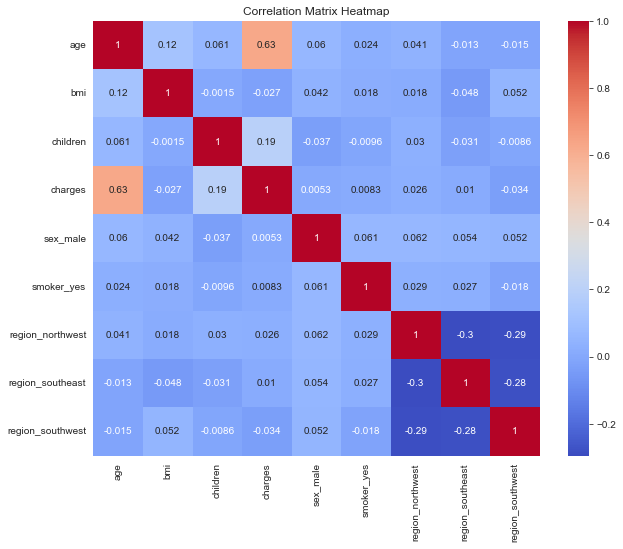

In [62]:
# we will visualize this mby plotting heatmap
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix Heatmap')
plt.show()

The color of the cell indicates the strength of the correlation, where blue represents negative correlation and red represents positive correlation. The intensity of the color indicates the degree of correlation, with darker shades indicating stronger correlation.

Looking at the heatmap generated for this dataset, we can see that the charges column has a relatively positive correlation with the age and number of children columns, while having a weak negative correlation with the bmi column. This suggests that as age and number of children increase, so do the medical charges, while a higher BMI tends to have a negative correlation with medical charges.

Additionally, we can see that the smoker_yes column has a positive correlation with the charges column, indicating that smokers tend to have higher medical charges compared to non-smokers. There is also a weak positive correlation between sex_male and charges, meaning that male gender tends to have slightly higher medical charges than female gender.

The heatmap also shows that there are no strong correlations between the region columns and the charges column, indicating that the location of the patients may not play a significant role in determining their medical charges.

<Figure size 864x864 with 0 Axes>

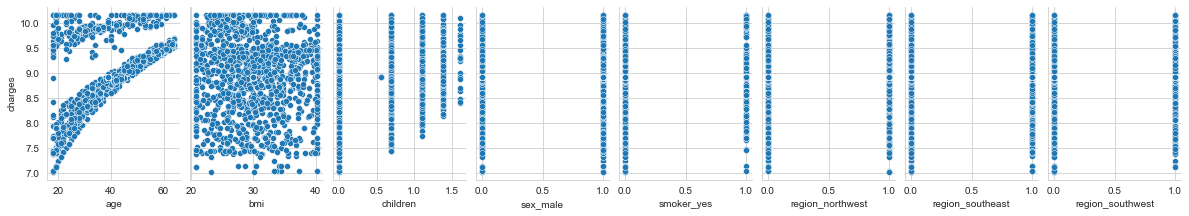

In [63]:
# Let's visualize correlatiob between target and independent variable using scatter plo

plt.figure(figsize=(12, 12))
sns.set_style("whitegrid")
sns.pairplot(data=df, y_vars=['charges'], x_vars=['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest'], height=3, aspect=0.7, kind='scatter', palette='coolwarm')
plt.show()

In [64]:
# Define Target and Features variables

target = df['charges']
features = df.drop('charges', axis=1)

print("Target variable name: ", target.name)
print("Target variable dimensions: ", target.shape)

print("\nFeatures variables names: ", list(features.columns))
print("Features variables dimensions: ", features.shape)

Target variable name:  charges
Target variable dimensions:  (1320,)

Features variables names:  ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Features variables dimensions:  (1320, 8)


In [65]:
# feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Assign the scaled features to a new variable
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Print the first 5 rows of the scaled dataframe
print(scaled_df)


           age       bmi  children  sex_male  smoker_yes  region_northwest  \
0     0.021739  0.366263  0.000000       0.0         1.0               0.0   
1     0.000000  0.669074  0.430677       1.0         0.0               0.0   
2     0.217391  0.629353  0.861353       1.0         0.0               0.0   
3     0.326087  0.098272  0.000000       1.0         0.0               1.0   
4     0.304348  0.416817  0.000000       1.0         0.0               1.0   
...        ...       ...       ...       ...         ...               ...   
1315  0.455473  0.473927  0.344367       0.0         0.0               1.0   
1316  0.455473  0.473927  0.344367       0.0         0.0               0.0   
1317  0.455473  0.473927  0.344367       0.0         0.0               0.0   
1318  0.455473  0.473927  0.344367       0.0         1.0               0.0   
1319  0.455473  0.473927  0.344367       1.0         0.0               1.0   

      region_southeast  region_southwest  
0                  0

In [66]:
# Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]
vif["features"] = features.columns
print(vif)

   VIF Factor          features
0    2.949751               age
1    3.143108               bmi
2    1.927802          children
3    1.772755          sex_male
4    1.122896        smoker_yes
5    1.568947  region_northwest
6    1.495276  region_southeast
7    1.517199  region_southwest


In [67]:
# Checking value count of target variable
target.value_counts()

8.920977     139
10.166619     60
7.402795       2
8.745640       1
8.750359       1
            ... 
9.379389       1
9.268837       1
8.946853       1
9.247875       1
8.779748       1
Name: charges, Length: 1122, dtype: int64

# Best Random State

In [68]:
# let's find best random state

# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

# Define the target variable and scaled features
target = df['charges']
features = scaled_df

# Define the range of random state values to try
random_state_range = range(1, 101)

# Initialize variables to store the best random state and R^2 score
best_random_state = None
best_score = 0

# Loop over the random state values to find the best one
for random_state in random_state_range:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=random_state)
    
    # Fit a linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the testing data and calculate the R^2 score
    score = model.score(X_test, y_test)
    
    # Update the best random state and score if this one is better
    if score > best_score:
        best_random_state = random_state
        best_score = score

# Print the best random state and score
print("Best random state:", best_random_state)
print("Best R^2 score:", best_score)

Best random state: 81
Best R^2 score: 0.5495598912202315


Best R^2 score is 0.5495598912202315 on Random state 81

In [69]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1056, 8)
(264, 8)
(1056,)
(264,)


# Modelling

Classification Algorithm

In [70]:
# Import Necessary Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression

In [71]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Define the target variable and features
target = df['charges']
features = scaled_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

# Initialize a Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_train)

# Evaluate the model using R-squared on training data
r2_train = r2_score(y_train, y_train_pred)
print("R-squared on training data:", (r2_train)*100)

# Make predictions on the testing data
y_test_pred = lr_model.predict(X_test)

# Evaluate the model using R-squared on testing data
r2_test = r2_score(y_test, y_test_pred)
print("R-squared on testing data:", r2_test)

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

# Evaluate the model using Root Mean Squared Error
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

R-squared on training data: 42.162118381422665
R-squared on testing data: 0.44718788945960397
Mean Absolute Error: 0.37856785529694004
Mean Squared Error: 0.31181662886747336
Root Mean Squared Error: 0.5584054341313964


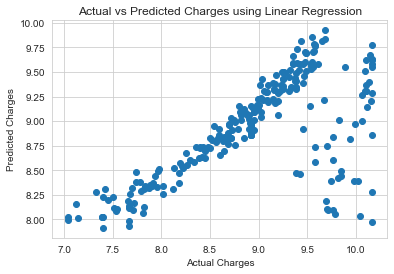

In [74]:
# linear regression plot to check the relation between actual n predicted value
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges using Linear Regression")
plt.show()

Here in this plot, we can see relatively tight cluster of points around the line, indicating that the model's predictions are reasonably accurate. However, there is some variability in the predictions, especially for higher insurance charges.

# Lasso

In [75]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

target = df['charges']
features = scaled_df

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
print("Training data R-squared:", (r2_train)*100)

r2_test = r2_score(y_test, y_test_pred)
print("Testing data R-squared:", r2_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

Training data R-squared: 17.63560516195277
Testing data R-squared: 0.1824409518828829
Mean Absolute Error: 0.5091369275318584
Mean Squared Error: 0.46114855558207124
Root Mean Squared Error: 0.6790791968408922


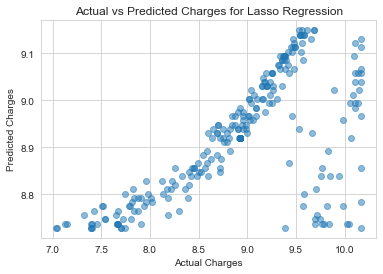

In [77]:
# Plot actual vs predicted values for Lasso regression
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges for Lasso Regression')
plt.show()

Here in this plot we can see the points are scattered so, can say this model is not accurately predicting the charge.

# Ridge

In [78]:
target = df['charges']
features = scaled_df


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
print("R-squared on testing data:", r2_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2_train = r2_score(y_train, ridge_model.predict(X_train))
print("R-squared on training data:", (r2_train)*100)

R-squared on testing data: 0.1824409518828829
Mean Absolute Error: 0.3785778618275824
Mean Squared Error: 0.3118255462610838
Root Mean Squared Error: 0.558413418768822
R-squared on training data: 42.16206277634077


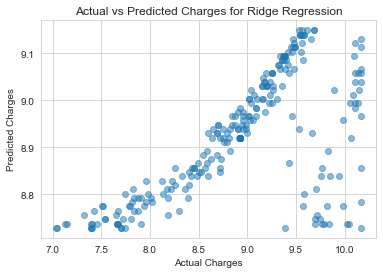

In [79]:
# Plot actual vs predicted values for Ridge regression
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges for Ridge Regression')
plt.show()

Here in this plot, we can see that the points are generally close to the 45-degree line, which indicates that the Ridge regression model has performed well. However, there are a few points that are far away from the line, indicating that the model has not been able to accurately predict the charges for these observations.

# Decision Tree Regressor

In [80]:
# Define the target variable and features
target = df['charges']
features = scaled_df


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)


dtr_model = DecisionTreeRegressor(random_state=100)
dtr_model.fit(X_train, y_train)

y_test_pred = dtr_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Testing R-squared:", r2_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)


y_train_pred = dtr_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Training R-squared:", (r2_train)*100)

Testing R-squared: 0.02178595526111049
Mean Absolute Error: 0.41209532196301435
Mean Squared Error: 0.5517668660390302
Root Mean Squared Error: 0.7428101143892901
Training R-squared: 99.97887200112135


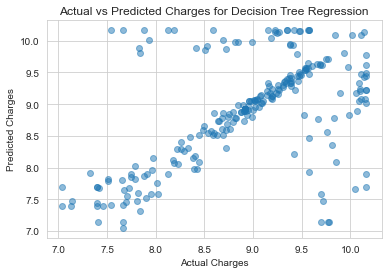

In [81]:
# Plot actual vs predicted values for Decision Tree Regression
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges for Decision Tree Regression')
plt.show()

Here in this plot, we see that the model has a decent performance as the points are somewhat scattered around the diagonal line but the majority of the points are close to it. This suggests that the model is making fairly accurate predictions.

# Random Forest Regressor

In [82]:
# Define the target variable and features
target = df['charges']
features = scaled_df

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

dtr_model = DecisionTreeRegressor(random_state=100)
dtr_model.fit(X_train, y_train)

y_test_pred = dtr_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Testing R-squared:", r2_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

y_train_pred = dtr_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Training R-squared:", (r2_train)*100)

Testing R-squared: 0.02178595526111049
Mean Absolute Error: 0.41209532196301435
Mean Squared Error: 0.5517668660390302
Root Mean Squared Error: 0.7428101143892901
Training R-squared: 99.97887200112135


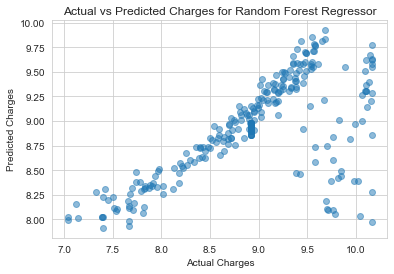

In [83]:
# Plot actual vs predicted values for Random Forest Regressor
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges for Random Forest Regressor')
plt.show()

Here in this plot, we can see that the scatter points are relatively close to the diagonal line, which indicates that the Random Forest Regressor has a good performance in predicting the target variable values.

# Support Vector Regressor

In [84]:
# Define the target variable and features
target = df['charges']
features = scaled_df

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

# Initialize an SVR model with a linear kernel
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

y_test_pred = svr_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Testing R-squared:", r2_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

y_train_pred = svr_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Training R-squared:", (r2_train)*100)

Testing R-squared: 0.3895840141892677
Mean Absolute Error: 0.32694466821585255
Mean Squared Error: 0.34430840293324094
Root Mean Squared Error: 0.5867779843631158
Training R-squared: 35.61690803844234


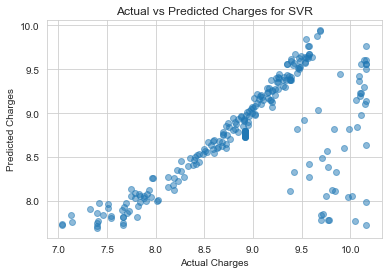

In [85]:
# Plot actual vs predicted values for SVR
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges for SVR')
plt.show()

Here this plot suggests that the support vector regressor model is performing reasonably well in predicting charges for new observations.

# KNeighbors Regressor

In [86]:
# Define the target variable and features
target = df['charges']
features = scaled_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

knr_model = KNeighborsRegressor(n_neighbors=5)
knr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred = knr_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Testing R-squared:", r2_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Make predictions on the training data
y_train_pred = knr_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Training R-squared:", (r2_train)*100)

Testing R-squared: 0.40251335504598573
Mean Absolute Error: 0.40672672047230435
Mean Squared Error: 0.3370155390423264
Root Mean Squared Error: 0.5805303945895739
Training R-squared: 48.81782285725127


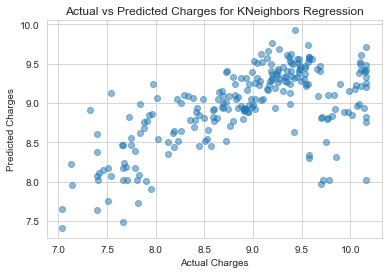

In [87]:
# Plot actual vs predicted values for KNeighbors regression
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges for KNeighbors Regression')
plt.show()

Here in this plot we can see the model seems to have done a decent job at predicting the charges.

# Gradient Boosting Regressor

In [88]:
# Define the target variable and features
target = df['charges']
features = scaled_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

gbr_model = GradientBoostingRegressor(random_state=100)
gbr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred = gbr_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Testing R-squared:", r2_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Make predictions on the training data
y_train_pred = gbr_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Training R-squared:", (r2_train)*100)

Testing R-squared: 0.4441765981943928
Mean Absolute Error: 0.3699782432751888
Mean Squared Error: 0.31351516381805233
Root Mean Squared Error: 0.5599242482854733
Training R-squared: 60.56803808944294


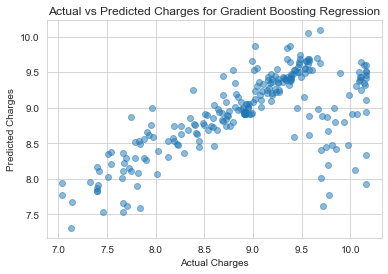

In [89]:
# Plot actual vs predicted values for Gradient Boosting Regression
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges for Gradient Boosting Regression')
plt.show()

Here in this plot we can see, the plot suggests that the Gradient Boosting Regressor model is a decent predictor for the target variable.

Cross validation score

In [90]:
# linear regression
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Linear Regression model
lr_model = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", (diff)*100)

Cross-Validation Scores:  [0.4698465  0.46933014 0.52412946 0.29709326 0.20737593]
Mean of CV Scores:  0.39355505661107315
Difference between R2 score and mean CV score:  5.3632832848530825


In [91]:
# Lasso
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Lasso regression model
lasso_model = Lasso(alpha=0.5)

# Perform cross-validation on the model
cv_scores = cross_val_score(lasso_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", (diff)*100)

Cross-Validation Scores:  [-0.00124295 -0.00010998 -0.00048694 -0.00831083 -0.00067774]
Mean of CV Scores:  -0.0021656885431137864
Difference between R2 score and mean CV score:  0.20092591805866536


In [92]:
# Ridge
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Ridge regression model
ridge_model = Ridge(alpha=0.5)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Calculate the R2 score for the model
r2 = ridge_model.score(X_test, y_test)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", (diff)*100)


Cross-Validation Scores:  [0.46942698 0.46911706 0.52339174 0.29790923 0.2085423 ]
Mean of CV Scores:  0.39367746458694886
Difference between R2 score and mean CV score:  5.342062667818414


In [93]:
# DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Calculate the R2 score for the model
r2 = dt_model.score(X_test, y_test)

# Perform cross-validation on the model
cv_scores = cross_val_score(dt_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
# Print the difference
print("Difference between R2 score and mean CV score: ", (diff)*100)

Cross-Validation Scores:  [-0.05549692 -0.37095209 -0.1689196  -0.18356538 -0.66870631]
Mean of CV Scores:  -0.28952805814338545
Difference between R2 score and mean CV score:  26.66496341656226


In [94]:
# RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Calculate the R2 score for the model
r2 = rf_model.score(X_test, y_test)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", (diff)*100)

Cross-Validation Scores:  [0.38169364 0.29619773 0.41146427 0.21176414 0.142096  ]
Mean of CV Scores:  0.2886431549151375
Difference between R2 score and mean CV score:  7.9269760717007305


In [95]:
# Support vector regressor
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Support Vector Regressor model
svr_model = SVR()

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Calculate the R2 score for the model
r2 = svr_model.score(X_test, y_test)

# Perform cross-validation on the model
cv_scores = cross_val_score(svr_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", (diff)*100)

Cross-Validation Scores:  [ 0.39075956  0.41786985  0.51804532  0.14623571 -0.01608249]
Mean of CV Scores:  0.29136559002291146
Difference between R2 score and mean CV score:  8.267836045549865


In [96]:
# KNeighbors Regressor
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a KNeighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(knn_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate the R2 score for the model
r2 = r2_score(y_test, y_pred)

# Calculate the difference between the R2 score and mean CV score
diff = r2 - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", (diff)*100)

Cross-Validation Scores:  [ 0.32900812  0.28008592  0.29372783  0.21362312 -0.05977346]
Mean of CV Scores:  0.21133430706547146
Difference between R2 score and mean CV score:  19.117904798051427


In [97]:
# GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Fit the model on the training data
gbr_model.fit(X_train, y_train)

# Calculate the R2 score for the model
r2 = gbr_model.score(X_test, y_test)

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = gbr_model.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", (diff)*100)

Cross-Validation Scores:  [0.42838072 0.39374072 0.51700916 0.26341004 0.24720001]
Mean of CV Scores:  0.3699481314186774
Difference between R2 score and mean CV score:  7.388047726144359


Based on the difference between R2 score and mean CV score , we can see that the Lasso Regression is the best performing model in this case. The smaller the difference, the better the model's generalization performance.
LassoRegression is the best fitted and performing model yet.

Now perform hyperparametertuning for more accuracy.


# Hyper Parameter Tuning

Grid Search CV

In [98]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the target variable and features
target = df['charges']
features = scaled_df

# Initialize a Lasso regression model
lasso_model = Lasso()

# Define the hyperparameters to tune
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1],
                   'max_iter': [100, 500, 1000, 5000],
                   'fit_intercept': [True, False],
                   'normalize': [True, False],
                   'selection': ['cyclic', 'random']}

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(lasso_model, hyperparameters, cv=5, scoring='r2')

# Fit the GridSearchCV object on the scaled data
grid_search.fit(scaled_features, target)

# Print the best hyperparameters and best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 5000, 'normalize': False, 'selection': 'random'}
Best R2 score:  0.3944035632078772


In [99]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso model with the best hyperparameters
lasso = Lasso(alpha=0.01, fit_intercept=True, max_iter=1000, normalize=False, selection='random')

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.44736547792713344
Mean Absolute Error: 0.3771010122309531
Mean Squared Error: 0.31171645914214546
Root Mean Squared Error: 0.5583157342777879


# Saving the model

In [105]:
import pickle

# Save the model to disk
filename = 'medical_insurance_cost_prediction_model.pkl'
pickle.dump(lasso, open("medical_insurance_cost_prediction_model.pkl", 'wb'))

We can use saved model for prediction on new dataset later

In [ ]:
# Load the saved model
with open('medical_insurance_cost_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)
    
# Prediction
# Make predictions on the new data
predictions = model.predict(new_data)   